In [10]:
import numpy as np
import matplotlib.pyplot as plt


In [11]:
# Load the variables from tov-final
r_o   = 1.0e+3          # outer radius (maximum radius)
r_c   = 1.0e-1          # central radius (minimum radius)
P_c   = 1.0e+2          # central pressure (maximal pressure)

# Specify and load the file
filename    = f'data/tov_{round(np.log10(r_o)):+}{round(np.log10(r_c)):+}{round(np.log10(P_c)):+}.npy'
loaded_data = np.load(filename)

# Unpack the values
r, m, P, rho, R, alpha, psi = loaded_data

In [12]:
# Variables to be plotted
W  = 1
v  = np.zeros_like(rho)

E  = rho
Sr = rho * (1 + P/rho) * W**2 * v
S  = rho * (1 + P/rho) * W**2 * v**2 + 3 * P

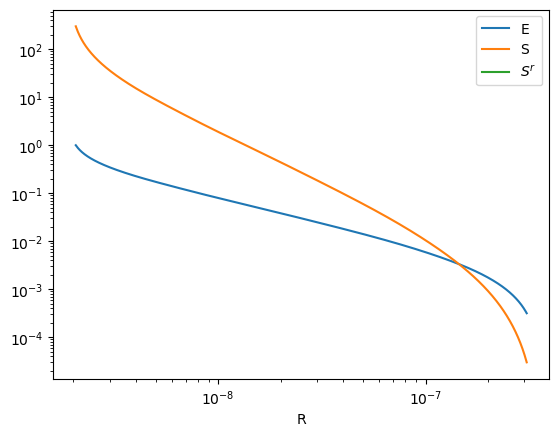

In [14]:
# Visualization
plt.figure
plt.plot(R, E, label="E")
plt.plot(R, S, label="S")
plt.plot(R, Sr, label=r"$S^r$")
plt.xscale('log')
plt.yscale('log')

plt.xlabel("R")
plt.legend()
plt.show()


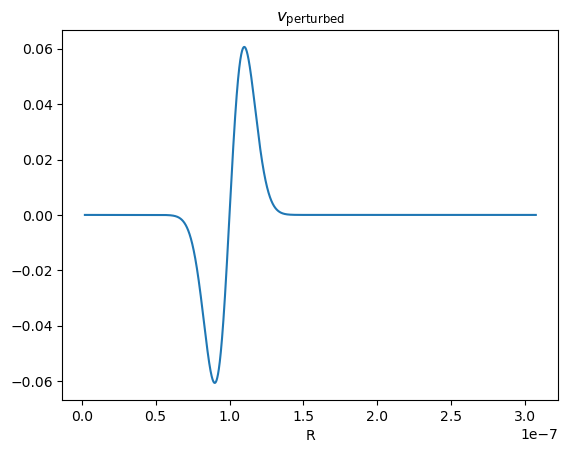

In [47]:
# Now apply a perturbation on the velocity v, effects on W are negligible
# Perturbation parameters
center_value = 10**(-7)   # Center value
sigma        = 10**(-8)   # Width of the full Gaussian
amplitude    = 1         # Scale factor

# Center Gaussian
center_index = np.argmin(np.abs(R - center_value))
R_centered = (R - R[center_index])/R[center_index]
gaussian = amplitude * np.exp(-((R - R[center_index]) ** 2) / (2 * sigma**2))

# Multiplication of Gaussian
v_perturbed = gaussian * R_centered

# Visualization
plt.figure
plt.plot(R, v_perturbed);
plt.xlabel('R');
plt.title(r"$v_{\text{perturbed}}$");


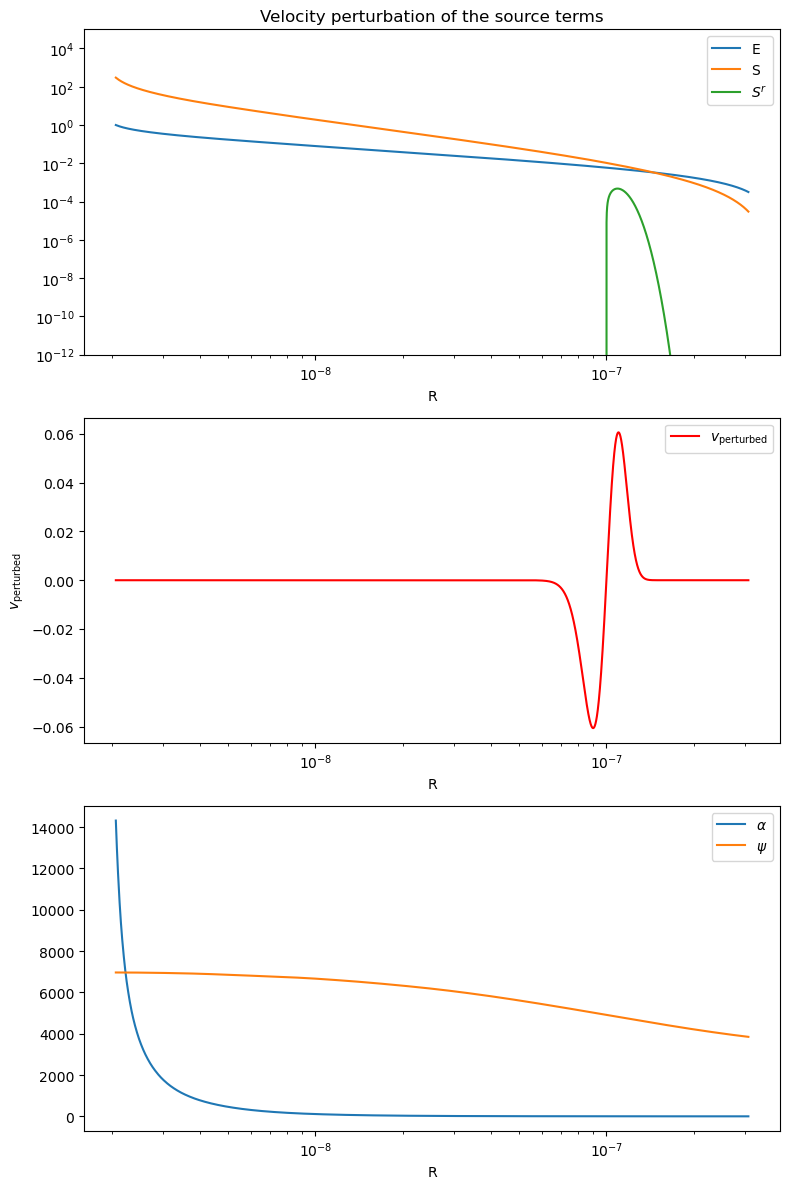

In [69]:
# Velocity perturbation of the source terms
E_perturbed  = rho
Sr_perturbed = rho * (1 + P/rho) * W**2 * v_perturbed
S_perturbed  = rho * (1 + P/rho) * W**2 * v_perturbed**2 + 3 * P

plt.figure(figsize=(8, 12))

# Figure: Perturbed source terms
plt.subplot(3, 1, 1)
plt.plot(R, E_perturbed,  label= "E")
plt.plot(R, S_perturbed,  label= "S")
plt.plot(R, Sr_perturbed, label= r"$S^r$")

# x- and y-scale
plt.yscale('log')
plt.xscale('log')
plt.ylim(10**(-12), 10**(5))
plt.xlabel('R')

# Title
plt.legend()
plt.title("Velocity perturbation of the source terms")

# Figure: Perturbed velocity
plt.subplot(3, 1, 2)
plt.plot(R, v_perturbed, label=r"$v_{\text{perturbed}}$", color="red")
plt.xscale('log')  
plt.xlabel('R')
plt.ylabel(r"$v_{\text{perturbed}}$")
plt.legend()


# Figure: Alpha and Psi
plt.subplot(3, 1, 3)
plt.plot(R, alpha,  label= r"$\alpha$")
plt.plot(R, psi,  label= r"$\psi$")
plt.xscale('log')  
plt.xlabel('R')
plt.legend()

plt.tight_layout()
plt.show()
